### Imports

In [1]:
import numpy as np
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}

###

sim_colors = {}

custom_blues_complement = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]
sim_colors['wdm_3'] = custom_blues_complement[1]
sim_colors['wdm_4'] = custom_blues_complement[2]
sim_colors['wdm_5'] = custom_blues_complement[3]
sim_colors['wdm_6'] = custom_blues_complement[4]
sim_colors['wdm_6.5'] = custom_blues_complement[5]
sim_colors['wdm_10'] = custom_blues_complement[6]

###

models = ['wdm_3', 'wdm_4', 'wdm_5', 'wdm_6', 'wdm_6.5', 'wdm_10']
masses = {'wdm_3': 3., 'wdm_4': 4., 'wdm_5': 5., 'wdm_6': 6., 'wdm_6.5': 6.5, 'wdm_10': 10., 'cdm': 1000.}
labels = {'wdm_3': r'$m_{\mathrm{WDM}}=3~\mathrm{keV}$', 'wdm_4': r'$m_{\mathrm{WDM}}=4~\mathrm{keV}$',
          'wdm_5': r'$m_{\mathrm{WDM}}=5~\mathrm{keV}$', 'wdm_6': r'$m_{\mathrm{WDM}}=6~\mathrm{keV}$',
          'wdm_6.5': r'$m_{\mathrm{WDM}}=6.5~\mathrm{keV}$', 'wdm_10': r'$m_{\mathrm{WDM}}=10~\mathrm{keV}$',
         'cdm':r'$\mathrm{CDM}$'}

In [2]:
base_mpeak = np.logspace(np.log10(3e5*300/0.7),np.log10(9e5*1.3e5/0.7),100)
x=0.5*(base_mpeak[1:]+base_mpeak[:-1])

def Mhm(mwdm):
    return 4.3e8 * (mwdm/3.)**(-3.564)

def f_ncdm(Mpeak,Mhm,alpha,beta,gamma):
    return (1.+(alpha*Mhm/Mpeak)**beta)**(-1.*gamma)

### Plot posterior

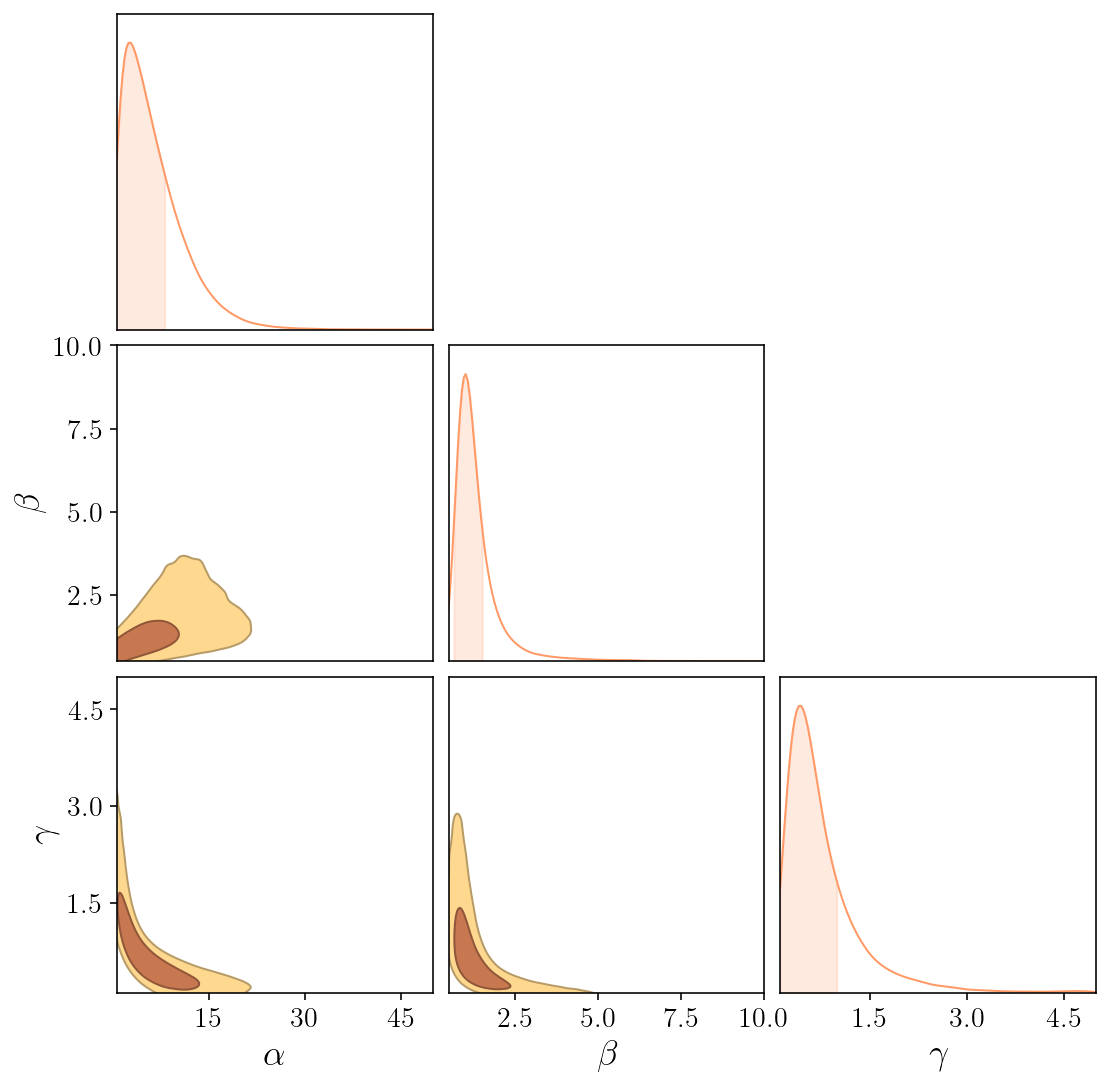

In [3]:
#Load this from Zenodo distribution: https://doi.org/10.5281/zenodo.14649137
samples = np.load('flat_samples_wdm.npy')
samples = samples[:,6:]

c = ChainConsumer()
c.add_chain(samples, parameters=[r"$\alpha$",r"$\beta$",r"$\gamma$"])

c.configure(colors=["#FF9966", "#FF7733"], shade=[True,False], bar_shade=True,spacing=1.0,
                diagonal_tick_labels=False, tick_font_size=14, label_font_size=18, sigma2d=False,max_ticks=4, 
                summary=False,kde=False)
fig = c.plotter.plot(figsize=(8,8), extents=[[0.5,50],[0.5,10],[0.1,5]],display=True)

### Plot SHMF suppression

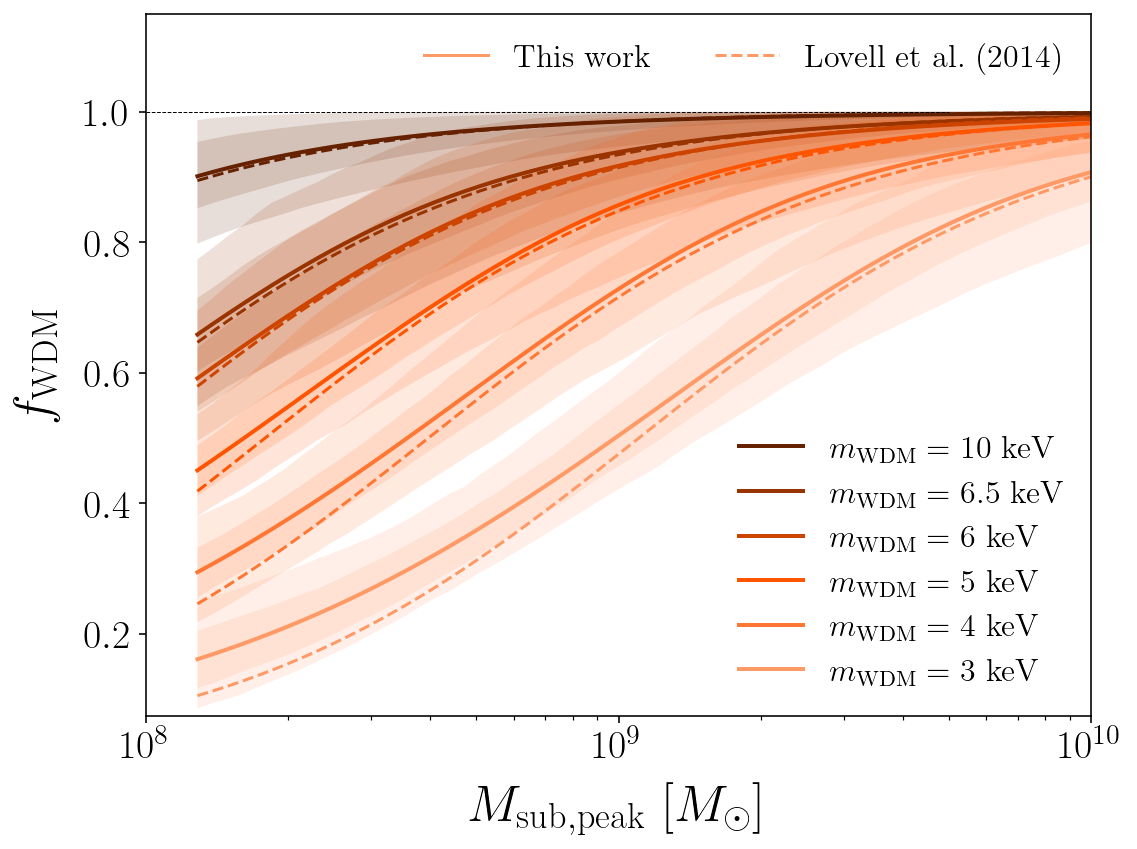

In [4]:
plt.figure(figsize=(8,6))
plt.xscale('log')

###
    
for model in ['wdm_3']:
    this_work = plt.plot(base_mpeak[:-1],-1.*np.ones(len(base_mpeak[:-1])),c=sim_colors[model],
                         label=r'$\mathrm{This\ work}$')
    lovell = plt.plot(base_mpeak[:-1],-1.*np.ones(len(base_mpeak[:-1])),c=sim_colors[model],lw=1.5,ls='--',
                         label=r'$\mathrm{Lovell\ et\ al.\ (2014)}$')

first_legend = plt.legend(handles=[this_work[0],lovell[0]],ncol=2,fontsize=16,frameon=False,loc=1)
plt.gca().add_artist(first_legend)

###

wdm_plot = []
for model in models[::-1]:
    
    ###
    
    pred = []
    for rand_int in np.random.randint(samples.shape[0],size=500):
        pred.append(f_ncdm(x,Mhm(masses[model]),samples[rand_int,0],samples[rand_int,1],samples[rand_int,2]))
         
    wdm_plot.append(plt.plot(base_mpeak[:-1],np.mean(pred,axis=0),c=sim_colors[model],label=labels[model],lw=2))
    
    plt.fill_between(base_mpeak[:-1],np.percentile(pred,16,axis=0),np.percentile(pred,84,axis=0),
                    alpha=0.15,facecolor=sim_colors[model])

    plt.fill_between(base_mpeak[:-1],np.percentile(pred,2.5,axis=0),np.percentile(pred,97.5,axis=0),
                    alpha=0.15,facecolor=sim_colors[model])
        
    ###
    
    #Lovell et al. (2014)
    plt.plot(base_mpeak[:-1],f_ncdm(x,Mhm(masses[model]),2.7, 1, 0.99),
                        c=sim_colors[model],ls='--',lw=1.5)  
    
###

plt.legend(handles=[wdm_plot[0][0],wdm_plot[1][0],wdm_plot[2][0],wdm_plot[3][0],wdm_plot[4][0],wdm_plot[5][0]],
           loc=4,fontsize=16,frameon=False,framealpha=1.0,ncol=1)
plt.plot(np.linspace(1e8,5e9,10),np.ones(10),'k--',lw=0.5)

###

plt.xlim(1e8,10**10)
plt.xticks([10**8,10**9,10**10],[r'$10^8$',r'$10^9$',r'$10^{10}$'], fontsize=20)
plt.ylim(0.075,1.15)
plt.yticks([0.2,0.4,0.6,0.8,1.0],[r'$0.2$',r'$0.4$',r'$0.6$',r'$0.8$',r'$1.0$'], fontsize=20)
plt.xlabel(r'$M_{\rm{sub,peak}}\ [M_{\mathrm{\odot}}]$',fontsize=26,labelpad=8)
plt.ylabel(r'$f_{\mathrm{WDM}}$', fontsize=26, labelpad=12)

###

plt.tight_layout()
plt.show()